# Data reading, cleaning and general initialisation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/301-330-days/Data_5IAL_3_301.csv
/kaggle/input/601-330-days/Data_5IAL_3_601.csv
/kaggle/input/301-17mar-1day/Data_5IAL_3_30114-3.csv


## importing Packages

In [2]:
from pandas_profiling import ProfileReport
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

print('Importing all done!')

Importing all done!


## Reading data from CSV
Reading both data from unit 301 and 601 from the masterplant

In [3]:
data=pd.read_csv('/kaggle/input/301-330-days/Data_5IAL_3_301.csv',parse_dates=[1],index_col=[0])
data.rename(columns={'0':'Date'},inplace=True)
data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,...,5IAL_3_GSC301.44,5IAL_3_GSO301.44,5IAL_3_LSL301.64,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_LSH301.56,5IAL_3_XPV301.13,5IAL_3_WY301.54
0,2022-04-10 12:00:00,21.80,9.84,-0.02,0.0,0.0,0.0,0.0,0.00105,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0
1,2022-04-10 12:01:00,21.80,9.84,-0.02,0.0,0.0,0.0,0.0,0.00106,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0
2,2022-04-10 12:02:00,21.80,9.84,-0.02,0.0,0.0,0.0,0.0,0.00102,2.07,...,0,0,0,0,0,0,1.41,0,0.0,0.0
3,2022-04-10 12:03:00,21.78,9.84,-0.02,0.0,0.0,0.0,0.0,0.00105,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0
4,2022-04-10 12:04:00,21.78,9.84,-0.02,0.0,0.0,0.0,0.0,0.00104,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0


## Readin CIP Data

In [4]:
fields = ['0', '5IAL_3_PC601.70FSP','5IAL_3_PC601.70PSP','5IAL_3_PIT601.55']

data_cip = pd.read_csv('/kaggle/input/601-330-days/Data_5IAL_3_601.csv', skipinitialspace=True, usecols=fields,parse_dates=[0])

data_cip.head()

,0,5IAL_3_PIT601.55,5IAL_3_PC601.70FSP,5IAL_3_PC601.70PSP
0,2022-04-10 12:00:00,1.31,5.0,1.31
1,2022-04-10 12:01:00,1.30,5.0,1.30
2,2022-04-10 12:02:00,1.30,5.0,1.30
3,2022-04-10 12:03:00,1.30,5.0,1.30
4,2022-04-10 12:04:00,1.30,5.0,1.30


In [5]:
print(data.dtypes)

Date                    datetime64[ns]
5IAL_3_TT301.50                float64
5IAL_3_QIT301.52               float64
5IAL_3_PIT 301.55              float64
5IAL_3_QIT301.57               float64
5IAL_3_PIT301.60               float64
5IAL_3_FIT301.61MF             float64
5IAL_3_FIT301.61VF             float64
5IAL_3_FIT301.61D              float64
5IAL_3_PIT301.63               float64
5IAL_3_P301.70                 float64
5IAL_3_R301.71                 float64
5IAL_3_P301.72                 float64
5IAL_3_301.BatchName            object
5IAL_3_XPV301.05                 int64
5IAL_3_XPV301.06                 int64
5IAL_3_XPV301.08                 int64
5IAL_3_XPV301.09                 int64
5IAL_3_XPV301.22                 int64
5IAL_3_XPV301.35                 int64
5IAL_3_XPV301.36                 int64
5IAL_3_XPV301.42                 int64
5IAL_3_XPV301.43                 int64
5IAL_3_XPV301.46                 int64
5IAL_3_XPV301.53                 int64
5IAL_3_XPV301.54         

# Data Analysis

## Look how many unique batches there are

In [6]:
Batch_Names=data['5IAL_3_301.BatchName']

unieque_names=Batch_Names.unique()

#np.set_printoptions(threshold=sys.maxsize)

data['5IAL_3_301.BatchName']= data['5IAL_3_301.BatchName'].fillna('No Batch Specified')

print(unieque_names)

[nan 'YP5812210101' 'YP5812210102' ... 'KB212306501' 'NA KB212306501'
 'KC112306501']


In [7]:
data.groupby(data['5IAL_3_301.BatchName']).size()

5IAL_3_301.BatchName
CB212211501        179
CB212211502        124
CB212215401        111
CB212215402        113
CB212220801        179
                  ... 
na MP7012305403     20
na YC112225904      22
na YP5812212302     19
na YP7012229902     28
na-kp7012226604     22
Length: 1629, dtype: int64

In [8]:
data['5IAL_3_301.BatchName'].str.len().value_counts()

18    294955
12     99133
11     54318
15      8175
24      6066
14      5952
19      4533
10       687
23       339
17       283
20       210
6        174
27        92
16        87
26        69
13        57
32        47
22        42
21        41
Name: 5IAL_3_301.BatchName, dtype: int64

## make a subset of the pressure related variables for easier selection

In [9]:
pressure=data.loc[:, ['5IAL_3_FIT301.61MF', '5IAL_3_XPV301.13', '5IAL_3_P301.70','5IAL_3_PIT 301.55']] 
pressure.head()

,5IAL_3_FIT301.61MF,5IAL_3_XPV301.13,5IAL_3_P301.70,5IAL_3_PIT 301.55
0,0.0,0.0,0.0,-0.02
1,0.0,0.0,0.0,-0.02
2,0.0,0.0,0.0,-0.02
3,0.0,0.0,0.0,-0.02
4,0.0,0.0,0.0,-0.02


## Normalise the selection with use of the Z-Score
The Z-score can be described as:
$$ Z=\frac{x-\mu}{\sigma} $$
Herein $x$ is your value, $\mu$ is the average of the population that value is taken from, and $\sigma$ is the standard deviation of the population.
It is basicaly a measure of how far a given value is away from its mean in standard deviations.
To give you a good feeling, in a normal distribution 66% of values are within 1 std of the mean. 99% are withing 2 std and 99.9 is within 3\
\
Note that i am not yet sure how representative all of this is for the data, it just allows me to use Massflow and resulting pressure more easaly because the range of values are simalar and i dont have to specify two seperate axis with values within 1 figure.

In [10]:
pres_norm=pd.DataFrame()
for col in pressure:
    zval=(pressure[col]-np.mean(pressure[col]))/np.std(pressure[col])
    pres_norm=pd.concat([pres_norm,zval],axis=1)
    
pres_norm.head()

,5IAL_3_FIT301.61MF,5IAL_3_XPV301.13,5IAL_3_P301.70,5IAL_3_PIT 301.55
0,-0.657435,-0.566649,-0.566645,-0.557907
1,-0.657435,-0.566649,-0.566645,-0.557907
2,-0.657435,-0.566649,-0.566645,-0.557907
3,-0.657435,-0.566649,-0.566645,-0.557907
4,-0.657435,-0.566649,-0.566645,-0.557907


# Create non-leakage Frac
My normalised frac uses averages and standerd deviation of the WHOLE dataset to normalize pressure and flow.\
However, these also include values that would now be placed in the val or test sets. That data leakage.\

To fix this ill make a frac only using values that are available\

In [11]:
pressure=data.loc[:, ['5IAL_3_FIT301.61MF', '5IAL_3_XPV301.13', '5IAL_3_P301.70','5IAL_3_PIT 301.55']] 
pressure.head()

,5IAL_3_FIT301.61MF,5IAL_3_XPV301.13,5IAL_3_P301.70,5IAL_3_PIT 301.55
0,0.0,0.0,0.0,-0.02
1,0.0,0.0,0.0,-0.02
2,0.0,0.0,0.0,-0.02
3,0.0,0.0,0.0,-0.02
4,0.0,0.0,0.0,-0.02


In [12]:
BatchName=data['5IAL_3_301.BatchName']

data.drop(['5IAL_3_301.BatchName'],axis=1,inplace=True)

data_norm=pd.DataFrame()
for col in data:
    zval=(data[col]-np.mean(data[col]))/np.std(data[col])
    data_norm=pd.concat([data_norm,zval],axis=1)
    
data_norm['5IAL_3_301.BatchName']=BatchName
data['5IAL_3_301.BatchName']=BatchName

data_norm['frac']=data_norm['5IAL_3_P301.70']/data_norm['5IAL_3_FIT301.61MF']

data_norm.head()

,Date,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,...,5IAL_3_LSL301.64,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_LSH301.56,5IAL_3_XPV301.13,5IAL_3_WY301.54,5IAL_3_301.BatchName,frac
0,-1.732047,-0.303589,0.745491,-0.557907,-0.181282,0.67215,-0.657435,-0.01498,-0.805631,0.008043,...,-0.385754,-0.096767,-0.072646,-0.732724,-0.564607,-0.067254,-0.566649,-0.60207,No Batch Specified,0.861902
1,-1.732040,-0.303589,0.745491,-0.557907,-0.181282,0.67215,-0.657435,-0.01498,-0.805611,0.008043,...,-0.385754,-0.096767,-0.072646,-0.732724,-0.564607,-0.067254,-0.566649,-0.60207,No Batch Specified,0.861902
2,-1.732033,-0.303589,0.745491,-0.557907,-0.181282,0.67215,-0.657435,-0.01498,-0.805691,0.008043,...,-0.385754,-0.096767,-0.072646,-0.732724,-0.564334,-0.067254,-0.566649,-0.60207,No Batch Specified,0.861902
3,-1.732025,-0.307931,0.745491,-0.557907,-0.181282,0.67215,-0.657435,-0.01498,-0.805631,0.008043,...,-0.385754,-0.096767,-0.072646,-0.732724,-0.564607,-0.067254,-0.566649,-0.60207,No Batch Specified,0.861902
4,-1.732018,-0.307931,0.745491,-0.557907,-0.181282,0.67215,-0.657435,-0.01498,-0.805651,0.008043,...,-0.385754,-0.096767,-0.072646,-0.732724,-0.564607,-0.067254,-0.566649,-0.60207,No Batch Specified,0.861902


# Agregating data

## Filtering out unwanted data

In [13]:
# Specify the name of the column to check the string length
column_name = '5IAL_3_301.BatchName'

# Create a boolean mask to select rows where the length of the specified column is between 11 and 12 characters (inclusive)
mask = (data_norm[column_name].str.len() >= 11) & (data_norm[column_name].str.len() <= 12)

# Use the boolean mask to select only the rows that meet the criteria
data_selected = data_norm[mask]

data_selected.head()

,Date,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,...,5IAL_3_LSL301.64,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_LSH301.56,5IAL_3_XPV301.13,5IAL_3_WY301.54,5IAL_3_301.BatchName,frac
1169,-1.723525,-0.314444,0.929021,-0.557907,-0.181282,0.67215,-0.657435,-0.014980,-0.805172,0.008043,...,-0.385754,-0.096767,-0.072646,-0.732724,-0.543533,-0.067254,-0.566649,-0.602070,YP5812210101,0.861902
1170,-1.723518,0.580062,0.929021,-0.557907,-0.181282,1.39459,-0.657435,-0.014980,-0.805232,0.008043,...,-0.385754,-0.096767,-0.072646,1.364770,-0.422016,-0.067254,-0.566649,-0.498183,YP5812210101,0.861902
1171,-1.723511,0.567035,0.793368,2.323822,-0.162484,1.39459,1.233181,0.010380,1.243098,0.008043,...,-0.385754,-0.096767,-0.072646,1.364770,0.007949,-0.067254,1.762495,-0.259970,YP5812210101,1.456354
1172,-1.723504,0.653881,0.809327,2.350019,-0.157636,1.39459,1.259766,0.010795,1.239704,0.008043,...,-0.385754,-0.096767,-0.072646,1.364770,0.275890,-0.067254,1.692621,-0.011302,YP5812210101,1.416383
1173,-1.723496,0.790662,0.944980,1.144933,-0.154875,0.67215,1.790307,0.017615,1.257273,0.008043,...,-0.385754,-0.096767,-0.072646,1.364770,0.290122,-0.067254,1.750849,0.091270,YP5812210101,0.983649


In [14]:

#  with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#      print(data_selected.groupby(data_selected['5IAL_3_301.BatchName']).size())

np.mean(data_selected.groupby(data_selected['5IAL_3_301.BatchName']).size())

127.34522821576763

## Last succesfull batch
26-6-22: CP7012217502 (24 june, 2 days prior) \\
6-10-22: MD112227901 (mid batch) \\
14-2-23: MD112304504 (mid batch) \\

In [15]:
print(data["5IAL_3_301.BatchName"][((data.index[data['Date'] == datetime.datetime(2022,6,26,4,0)]))])
#(2022,10,6,11,23),(2023,2,14,12,51)

110400    No Batch Specified
Name: 5IAL_3_301.BatchName, dtype: object


In [16]:
mean_grouped=data_selected.groupby(pd.Grouper(key="5IAL_3_301.BatchName")).mean()
mean_grouped=mean_grouped.add_suffix('_mean')

print(mean_grouped.size)
mean_grouped.head()

46995


,Date_mean,5IAL_3_TT301.50_mean,5IAL_3_QIT301.52_mean,5IAL_3_PIT 301.55_mean,5IAL_3_QIT301.57_mean,5IAL_3_PIT301.60_mean,5IAL_3_FIT301.61MF_mean,5IAL_3_FIT301.61VF_mean,5IAL_3_FIT301.61D_mean,5IAL_3_PIT301.63_mean,...,5IAL_3_GSO301.44_mean,5IAL_3_LSL301.64_mean,5IAL_3_LSL301.68_mean,5IAL_3_LSLL301.69_mean,5IAL_3_301.OCCUPIED_mean,5IAL_3_LIT301.54_mean,5IAL_3_LSH301.56_mean,5IAL_3_XPV301.13_mean,5IAL_3_WY301.54_mean,frac_mean
5IAL_3_301.BatchName,,,,,,,,,,,,,,,,,,,,,
YP5812210101,-1.723124,1.278854,-0.035934,0.948097,-0.123006,0.691675,1.143608,0.007764,1.057347,0.008043,...,-1.049978,-0.385754,-0.096767,-0.072646,1.100222,0.997656,-0.067254,1.165416,1.028024,0.962653
YP5812210102,-1.722344,1.361691,-0.139623,1.139846,-0.124932,0.686178,1.291588,0.009624,1.075105,0.008043,...,-1.067173,-0.385754,1.017206,-0.072646,1.364770,0.937194,-0.067254,1.304581,0.996690,0.967200
CD112210101,-1.717825,0.090477,0.734658,0.788717,0.309596,0.675419,1.269400,0.010706,1.019767,0.007837,...,-1.114857,-0.385754,-0.096767,-0.072646,1.279352,0.564483,-0.067254,1.297140,0.519023,0.975246
CD112210102,-1.716640,0.194394,-0.030908,1.008403,0.018614,0.672150,1.314924,0.010715,1.020273,0.007547,...,-1.150344,-0.385754,-0.096767,-0.072646,1.364770,0.867537,-0.067254,1.372923,0.898247,1.000935
CD112210103,-1.715893,0.349406,-0.086993,0.996826,0.019674,0.672150,1.287703,0.010276,1.184275,0.007343,...,-1.247905,-0.385754,-0.096767,-0.072646,1.364770,1.119721,-0.067254,1.324109,1.146439,0.971669


In [17]:
std_grouped=data_selected.groupby(pd.Grouper(key="5IAL_3_301.BatchName")).std()
std_grouped=std_grouped.add_suffix('_std')

std_grouped.head()

,Date_std,5IAL_3_TT301.50_std,5IAL_3_QIT301.52_std,5IAL_3_PIT 301.55_std,5IAL_3_QIT301.57_std,5IAL_3_PIT301.60_std,5IAL_3_FIT301.61MF_std,5IAL_3_FIT301.61VF_std,5IAL_3_FIT301.61D_std,5IAL_3_PIT301.63_std,...,5IAL_3_GSO301.44_std,5IAL_3_LSL301.64_std,5IAL_3_LSL301.68_std,5IAL_3_LSLL301.69_std,5IAL_3_301.OCCUPIED_std,5IAL_3_LIT301.54_std,5IAL_3_LSH301.56_std,5IAL_3_XPV301.13_std,5IAL_3_WY301.54_std,frac_std
5IAL_3_301.BatchName,,,,,,,,,,,,,,,,,,,,,
YP5812210101,0.000235,0.401954,0.793668,0.898679,0.045965,0.117684,1.064863,0.013445,0.768804,0.000000,...,0.737903,0.0,0.00000,0.0,0.699508,0.916163,0.0,1.011264,0.924662,0.100506
YP5812210102,0.000218,0.386031,0.861026,0.775307,0.045137,0.100175,0.941757,0.011884,0.750691,0.000000,...,0.720237,0.0,3.23736,0.0,0.000000,0.877580,0.0,0.923479,0.907031,0.193178
CD112210101,0.000466,0.444474,1.489412,0.697101,0.647035,0.048597,0.963998,0.012897,0.670736,0.000135,...,0.663935,0.0,0.00000,0.0,0.415511,0.955195,0.0,0.931821,1.020371,0.067517
CD112210102,0.000220,0.249685,1.162813,0.704617,0.313112,0.000000,0.880706,0.011489,0.725316,0.000132,...,0.619532,0.0,0.00000,0.0,0.000000,0.923870,0.0,0.863703,0.971097,0.079667
CD112210103,0.000214,0.226093,1.019104,0.762636,0.309712,0.000000,0.932641,0.012119,0.503539,0.000144,...,0.455927,0.0,0.00000,0.0,0.000000,0.854166,0.0,0.908170,0.875797,0.153641


In [18]:
#data_selected.drop(['Date'],axis=1,inplace=True)


from scipy.stats import skew, kurtosis


#skew_kurt_grouped = data_selected.groupby("5IAL_3_301.BatchName").apply(lambda x: pd.Series({'skewness': skew(x), 'kurtosis': kurtosis(x)})).reset_index()


max_grouped=data_selected.groupby(pd.Grouper(key="5IAL_3_301.BatchName")).max()
max_grouped=max_grouped.add_suffix('_max')

min_grouped=data_selected.groupby(pd.Grouper(key="5IAL_3_301.BatchName")).min()
min_grouped=min_grouped.add_suffix('_min')

var_grouped=data_selected.groupby(pd.Grouper(key="5IAL_3_301.BatchName")).var()
var_grouped=var_grouped.add_suffix('_var')

sum_grouped=data_selected.groupby(pd.Grouper(key="5IAL_3_301.BatchName")).sum()
sum_grouped=sum_grouped.add_suffix('_sum')


#skew_kurt_grouped.head()

In [19]:
# print(np.mean(mean_grouped['frac']))

# p90 = mean_grouped['frac'].quantile(0.95)

# print(p90)

In [20]:
# fig, ax = plt.subplots(figsize=(20,10))

# ax.plot(mean_grouped['frac'].rolling(10).mean())


# plt.xlabel('Batch Name', fontsize=18)
# plt.ylabel('Fraction of normaliszed pressure and flow', fontsize=18)

# plt.tick_params(axis='both', labelsize=14)

# ax.xaxis.set_major_locator(plt.MaxNLocator(6))

# ax.axhline(mean_grouped['frac'].quantile(0.90),color='r')

# ax.axvline('MD112304504',color='y')
# ax.axvline('MD112227901',color='y')
# ax.axvline('CP7012217502',color='y')

# plt.legend(['Normalised fraction of input pressure and flow','Historical errors'], fontsize=18)

# fig.savefig('plaatje',bbox_inches="tight")

# fig.show()

In [21]:
Batch_duration=data.groupby(data['5IAL_3_301.BatchName']).size()

Batch_duration=pd.DataFrame(Batch_duration, columns=['Batch_duration'])

display(Batch_duration)

,Batch_duration
5IAL_3_301.BatchName,
CB212211501,179
CB212211502,124
CB212215401,111
CB212215402,113
CB212220801,179
...,...
na MP7012305403,20
na YC112225904,22
na YP5812212302,19


CP7012217502

In [22]:
Batch_Names=data['5IAL_3_301.BatchName'][mask]
unieque_names=pd.DataFrame(Batch_Names.unique(),columns=['5IAL_3_301.BatchName'])

print(unieque_names)
print(unieque_names.loc[0][0][0:2])

batch_types_list=[]

for i in range(len(unieque_names)):
    if len(unieque_names.loc[i][0]) == 11:
        substring=unieque_names.loc[i][0][0:3]
    else:
        substring=unieque_names.loc[i][0][0:4]
    batch_types_list.append(substring.upper())

series=pd.Series(batch_types_list)
series= series.replace({'IU7':'IU70'})
print(series)
series_unieque=series.unique()
print(series_unieque)

     5IAL_3_301.BatchName
0            YP5812210101
1            YP5812210102
2             CD112210101
3             CD112210102
4             CD112210103
...                   ...
1200          CB212306201
1201          KB212306201
1202          KB212306202
1203          KB212306501
1204          KC112306501

[1205 rows x 1 columns]
YP
0       YP58
1       YP58
2        CD1
3        CD1
4        CD1
        ... 
1200     CB2
1201     KB2
1202     KB2
1203     KB2
1204     KC1
Length: 1205, dtype: object
['YP58' 'CD1' 'KD1' 'MD1' 'YD1' 'YP70' 'KP70' 'CP70' 'MP70' 'YB2' 'CB2'
 'KC1' 'KB2' 'MB2' 'MP55' 'CP55' 'KP55' 'YP55' 'KP58' 'CP58' 'MP58' 'YC1'
 'CC1' 'MC1' 'IU70' 'CGB2' 'CGD1']


# Mark batches
Mark thes batches that are within 10 batches of a failure,

In [23]:
Batch_Names=data['5IAL_3_301.BatchName'][mask] #gets all batches

unieque_names=pd.DataFrame(Batch_Names.unique(),columns=['5IAL_3_301.BatchName'])



search_strings = ['MD112304504', 'CP7012217502'] # ['MD112304504','MD112227901', 'CP7012217502'] -MD112227901

# # Create a new column with boolean values
unieque_names['contains_search_string'] = False

print(unieque_names)


for i in range(len(unieque_names)):
    for j in range(i+1, min(i+6, len(unieque_names))):
        if any([search_str == unieque_names.loc[j, '5IAL_3_301.BatchName'] for search_str in search_strings]):
            unieque_names.loc[i, 'contains_search_string'] = True
            break
            
print(np.sum(unieque_names['contains_search_string']))

     5IAL_3_301.BatchName  contains_search_string
0            YP5812210101                   False
1            YP5812210102                   False
2             CD112210101                   False
3             CD112210102                   False
4             CD112210103                   False
...                   ...                     ...
1200          CB212306201                   False
1201          KB212306201                   False
1202          KB212306202                   False
1203          KB212306501                   False
1204          KC112306501                   False

[1205 rows x 2 columns]
10


In [24]:
print(unieque_names['5IAL_3_301.BatchName'][unieque_names['contains_search_string']])

310     KP7012217402
311     CP7012217401
312     CP7012217402
313     CP7012217403
314     CP7012217501
1103     MD112304407
1104     MD112304408
1105     MD112304501
1106     MD112304502
1107     MD112304503
Name: 5IAL_3_301.BatchName, dtype: object


In [25]:
Eind=pd.merge(pd.merge(mean_grouped,std_grouped,on=['5IAL_3_301.BatchName']), unieque_names, on=['5IAL_3_301.BatchName'])
print(np.sum(Eind['contains_search_string']))

# Add in Batch duration
Eind=pd.merge(Eind,Batch_duration,on=['5IAL_3_301.BatchName'])
Eind=pd.merge(Eind,max_grouped,on=['5IAL_3_301.BatchName'])
#Eind=pd.merge(Eind,min_grouped,on=['5IAL_3_301.BatchName'])
Eind=pd.merge(Eind,var_grouped,on=['5IAL_3_301.BatchName'])
Eind=pd.merge(Eind,sum_grouped,on=['5IAL_3_301.BatchName'])


10


# Preparing Data for ML Models

In [26]:
One_hot=pd.get_dummies(series)
print(One_hot)

      CB2  CC1  CD1  CGB2  CGD1  CP55  CP58  CP70  IU70  KB2  ...  MD1  MP55  \
0       0    0    0     0     0     0     0     0     0    0  ...    0     0   
1       0    0    0     0     0     0     0     0     0    0  ...    0     0   
2       0    0    1     0     0     0     0     0     0    0  ...    0     0   
3       0    0    1     0     0     0     0     0     0    0  ...    0     0   
4       0    0    1     0     0     0     0     0     0    0  ...    0     0   
...   ...  ...  ...   ...   ...   ...   ...   ...   ...  ...  ...  ...   ...   
1200    1    0    0     0     0     0     0     0     0    0  ...    0     0   
1201    0    0    0     0     0     0     0     0     0    1  ...    0     0   
1202    0    0    0     0     0     0     0     0     0    1  ...    0     0   
1203    0    0    0     0     0     0     0     0     0    1  ...    0     0   
1204    0    0    0     0     0     0     0     0     0    0  ...    0     0   

      MP58  MP70  YB2  YC1  YD1  YP55  

## All ML imports

In [27]:
from sklearn.neural_network import MLPClassifier #(https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

from imblearn.over_sampling import SMOTE

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.ensemble import RandomForestClassifier

import shap

from keras import layers

In [28]:
from sklearn.decomposition import PCA

X_t = Eind.drop(['5IAL_3_301.BatchName','contains_search_string'],axis=1)

X_t=X_t.fillna(0)

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_t)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196
0,-296.056686,-72.522423,-87.477844,-24.877292,-69.530762,-152.898785,2.061774,-6.984018,4.195218,-5.972992,...,7.709294e-13,-1.592984e-12,2.718832e-12,-2.222992e-12,-1.916560e-12,1.482410e-12,2.144885e-12,2.221590e-12,2.475468e-12,2.946609e-12
1,-295.849848,-83.436113,-97.305942,-54.483292,37.483767,-174.591500,-5.458564,-39.924265,-3.076057,-7.680211,...,1.230483e-12,-7.074911e-13,-4.874013e-13,-3.278869e-13,-1.334007e-12,9.446158e-13,-1.946088e-13,1.689971e-12,-1.488776e-12,-2.042129e-12
2,-299.205378,341.538514,-121.767985,-91.287878,-107.358092,-199.788188,51.044460,-84.825864,308.039258,-26.357155,...,-3.869468e-13,-8.383178e-14,4.903437e-13,-9.487596e-14,-1.662305e-13,-7.738747e-13,5.297642e-13,-1.429079e-12,1.397635e-12,2.147434e-12
3,-295.998996,-95.052458,-87.910293,-63.737706,-62.119731,-112.158705,5.380579,-17.592873,110.940976,-1.563111,...,-9.731781e-13,6.203632e-13,-1.136532e-12,7.703469e-13,1.804323e-12,-1.268900e-12,-2.038353e-12,-1.053645e-12,-6.224594e-13,9.163035e-13
4,-295.866762,-79.289275,-71.050498,-38.253214,-58.512668,-111.619038,-5.395393,-11.753392,95.749080,1.229246,...,6.063048e-13,-4.472731e-13,-8.149146e-14,3.198912e-13,-5.004266e-13,5.703610e-13,1.298928e-12,-1.431777e-13,3.949657e-13,3.087724e-13


## Proper data splitting
y contain a True the last 10 batches that got produced before a breakdown.\
Another way to put it is the question: 'Will there be a failure within the next 11 batches?'\
\
The data is spilt into train, test and validation

In [29]:
y = Eind['contains_search_string']

X=pd.concat([X_pca,One_hot],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True) #split data into validation and train+test



print(len(X))
print(len(X_train))


1205
903


In [30]:
print(X)

             PC1         PC2         PC3         PC4         PC5         PC6  \
0    -296.056686  -72.522423  -87.477844  -24.877292  -69.530762 -152.898785   
1    -295.849848  -83.436113  -97.305942  -54.483292   37.483767 -174.591500   
2    -299.205378  341.538514 -121.767985  -91.287878 -107.358092 -199.788188   
3    -295.998996  -95.052458  -87.910293  -63.737706  -62.119731 -112.158705   
4    -295.866762  -79.289275  -71.050498  -38.253214  -58.512668 -111.619038   
...          ...         ...         ...         ...         ...         ...   
1200 -296.734011  -81.834180   27.265496  147.361564   75.548759  255.890206   
1201 -296.494136  -96.581239  -88.950513  -56.873125   60.334586  256.599205   
1202 -299.543504  454.557747 -136.747524 -121.093895  127.919908  480.125407   
1203 -294.950441  249.215737  -47.259209   52.863182  119.144316  414.654783   
1204 -295.768001 -175.922447 -113.932288  -89.291067    3.570364  107.834749   

            PC7        PC8         PC9 

In [31]:
print(len(X_test))

302


<AxesSubplot:xlabel='PC17', ylabel='PC16'>

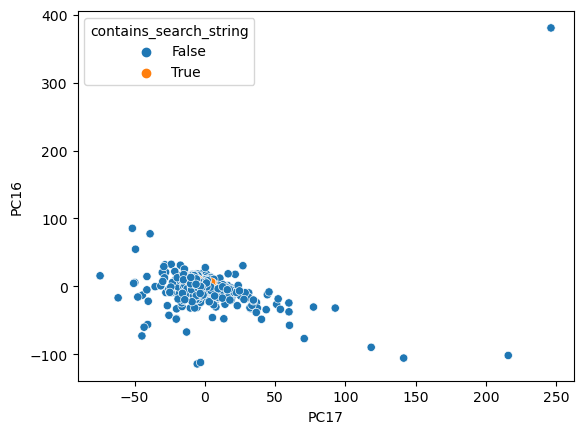

In [32]:
sns.scatterplot(x=X_pca['PC17'],y=X_pca['PC16'],hue=y)

In [33]:
# print(X[X == np.inf].count().sum())
# print(X.isna().sum())

## SMOTE
SMOTE stands for Synthetic Minority Oversampeling Technique.
It is a way to fix unbalanced datasets by oversampeling closely related plausible values.

In [34]:
oversample = SMOTE()
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)

print(y_train_o.value_counts())


False    896
True     896
Name: contains_search_string, dtype: int64


In [35]:
def devide(x,y):
    if ((x == 0) | (y == 0)):
        return 0
    else: 
        return x/y


# Neural network classifier

[[299   0]
 [  2   1]]


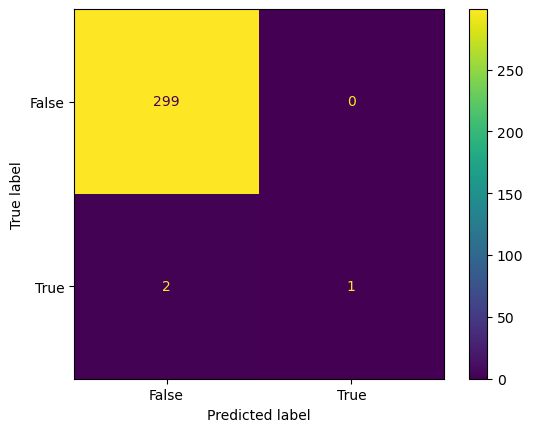

In [36]:
model_MLPC=MLPClassifier()

model_MLPC.fit(X_train,y_train)

y_fit=model_MLPC.predict(X_train)
y_pred=model_MLPC.predict(X_test)
y_tot=model_MLPC.predict(X)



cf=confusion_matrix(y_test,y_pred)



print(cf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

## Neural Network Classifier with SMOTE 

0.4


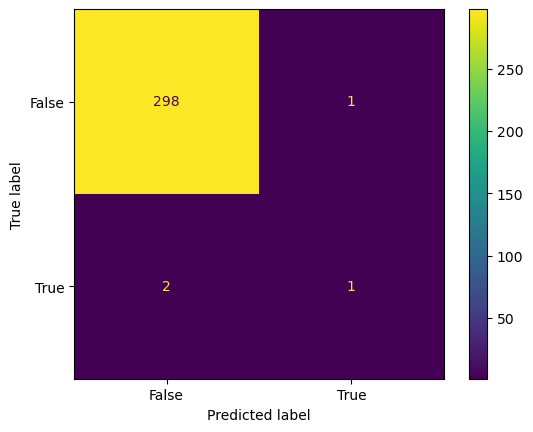

0.9333333333333333


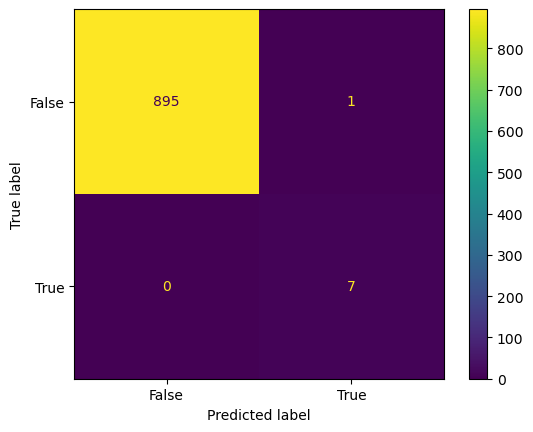

In [37]:
model=MLPClassifier(max_iter=1000,hidden_layer_sizes=(200,3))

#Using SMOTE
model.fit(X_train_o,y_train_o)

# Only train using SMOTE, it should predict on the normal data
y_fit=model.predict(X_train)
y_pred=model.predict(X_test)
y_tot=model.predict(X)

# Get stuff from confusion matrix to be able to calculate F1-score
cf=confusion_matrix(y_test,y_pred)
TN=cf[0][0]
TP=cf[1][1]
FP=cf[0][1]
FN=cf[1][0]

Recall=devide(TP,(TP+FN))
Precision=devide(TP,(TP+FP))
F1=2*devide((Recall*Precision),(Precision+Recall))
        
print(F1)

#Make neat plot
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()





cf=confusion_matrix(y_train,y_fit)
TN=cf[0][0]
TP=cf[1][1]
FP=cf[0][1]
FN=cf[1][0]

Recall=devide(TP,(TP+FN))
Precision=devide(TP,(TP+FP))
F1=2*devide((Recall*Precision),(Precision+Recall))
        
print(F1)

#Make neat plot
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

In [38]:
# result_arr=[]
# for layers in range(100,300,10):
#     loop_arr=[]
#     for i in range(5):
#         model=MLPClassifier(max_iter=1000, hidden_layer_sizes=(layers,3))

#         #Using SMOTE
#         model.fit(X_train_o,y_train_o)

#         # Only train using SMOTE, it should predict on the normal data
#         y_fit=model.predict(X_train)
#         y_pred=model.predict(X_test)
#         y_tot=model.predict(X)

#         # Get stuff from confusion matrix to be able to calculate F1-score
#         cf=confusion_matrix(y_test,y_pred)
#         TN=cf[0][0]
#         TP=cf[1][1]
#         FP=cf[0][1]
#         FN=cf[1][0]

#         Recall=devide(TP,(TP+FN))
#         Precision=devide(TP,(TP+FP))
#         F1=2*devide((Recall*Precision),(Precision+Recall))
        
#         loop_arr.append(F1)
#     result_arr.append(np.mean(loop_arr))
    


In [39]:
# Permutation importance
# perm = PermutationImportance(model).fit(X_test, y_test)
# eli5.show_weights(perm, feature_names = X_test.columns.tolist(),top=100)

## Optemising ANN SMOTE 

This model seems very prone to overfitting, so reducing layer size seems smart.\
What the ideal size is will be tested using the below loop.


In [40]:
# empt_arr=[]
# f1_arr=[]
# for i in range(1,100,3):
#     for j in range(5):
#         model=MLPClassifier(hidden_layer_sizes=50)

#         model.fit(X_traino,y_traino)

#         y_fit=model.predict(X_train)
#         y_pred=model.predict(X_test)
#         y_tot=model.predict(X)

#         cf=confusion_matrix(y,y_tot)
#         TN=cf[0][0]
#         TP=cf[1][1]
#         FP=cf[0][1]
#         FN=cf[1][0]

#         Recall=TP/(TP+FN)
#         Precision=TP/(TP+FP)
#         F1=2*((Recall*Precision)/(Precision+Recall))
        
#         f1_arr.append(F1)
        

#     empt_arr.append(np.mean(f1_arr))

    
# print(empt_arr)
# plt.plot(range(1,100,3),empt_arr)

# Random Forest (RF) Classifier

## RF model trainen + CFM

0


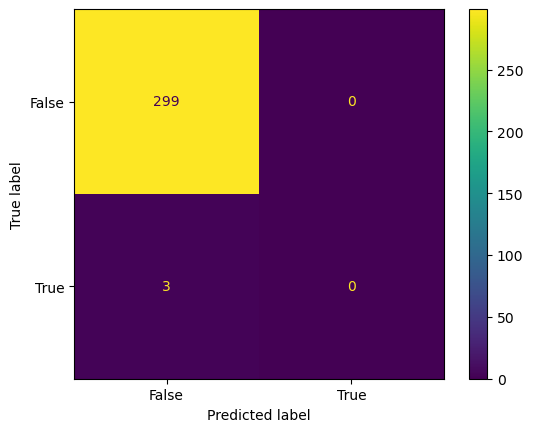

In [41]:
model =  RandomForestClassifier()

model.fit(X_train_o,y_train_o)

y_fit=model.predict(X_train)
y_pred=model.predict(X_test)
y_tot=model.predict(X)



cf=confusion_matrix(y_test,y_pred)
TN=cf[0][0]
TP=cf[1][1]
FP=cf[0][1]
FN=cf[1][0]

Recall=devide(TP,(TP+FN))
Precision=devide(TP,(TP+FP))
F1=2*devide((Recall*Precision),(Precision+Recall))
        
print(F1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()


# perm = PermutationImportance(model).fit(X_test, y_test)
# eli5.show_weights(perm, feature_names = X_test.columns.tolist(),top=1000)

## RF Train CFM

1.0


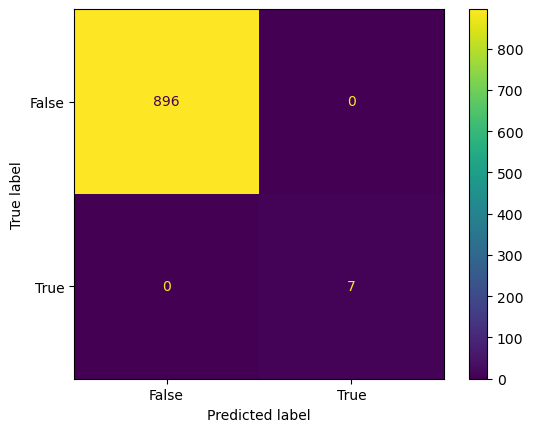

In [42]:
cf=confusion_matrix(y_train,y_fit)
TN=cf[0][0]
TP=cf[1][1]
FP=cf[0][1]
FN=cf[1][0]


Recall=devide(TP,(TP+FN))
Precision=devide(TP,(TP+FP))
F1=2*devide((Recall*Precision),(Precision+Recall))
        

print(F1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

In [43]:
# empty_arr=[]
# depth_arr=[]

# for depth in range(1,40):
#     F1_arr=[]
#     for i in range(5):
#         model =  RandomForestClassifier(max_depth=depth)

#         model.fit(X_train_o,y_train_o)

#         y_fit=model.predict(X_train)
#         y_pred=model.predict(X_test)
#         y_tot=model.predict(X)



#         cf=confusion_matrix(y_test,y_pred)
#         TN=cf[0][0]
#         TP=cf[1][1]
#         FP=cf[0][1]
#         FN=cf[1][0]

#         Recall=devide(TP,(TP+FN))
#         Precision=devide(TP,(TP+FP))
#         F1=2*devide((Recall*Precision),(Precision+Recall))
        
#         F1_arr.append(F1)
        
        
#     empty_arr.append(np.mean(F1_arr))
#     depth_arr.append(depth)
    
# plt.plot(depth_arr,empty_arr)

## Feature importance using SHAP

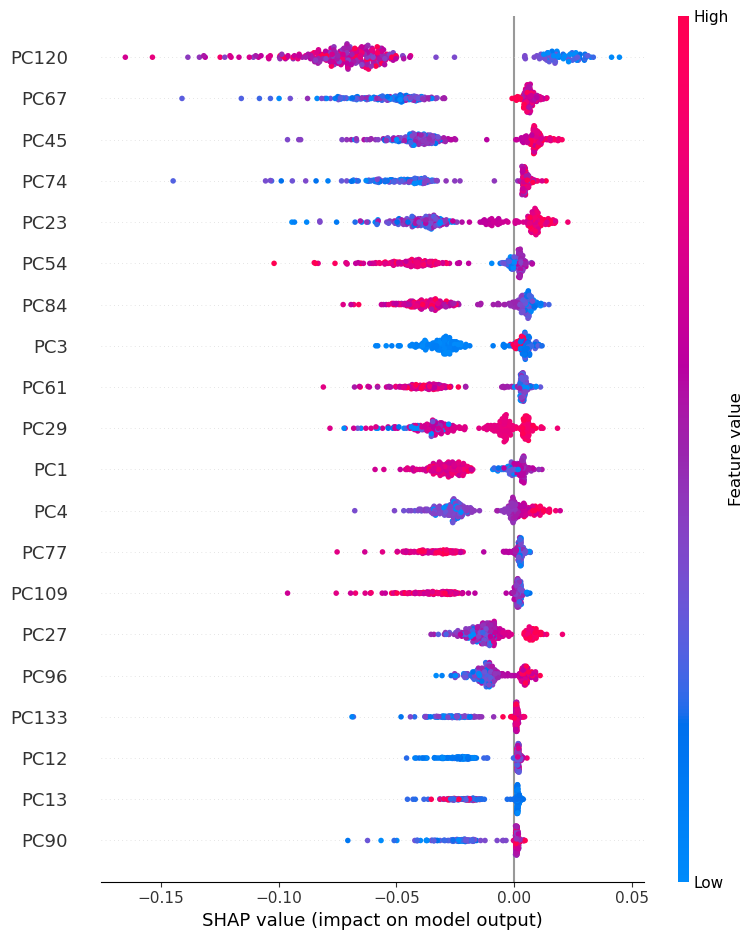

In [44]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

# XGBoost

0


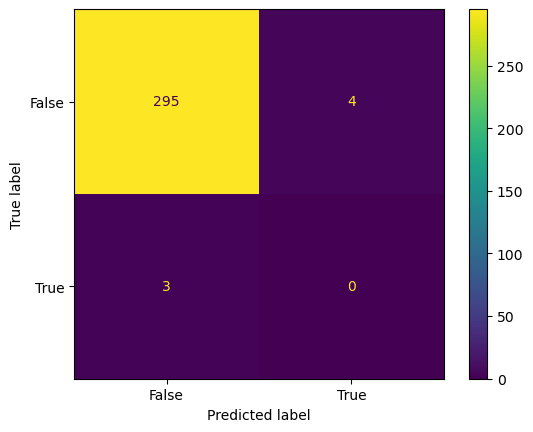

In [45]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train_o, y_train_o)

y_fit=model.predict(X_train)
y_pred=model.predict(X_test)
y_tot=model.predict(X)

cf=confusion_matrix(y_test,y_pred)
TN=cf[0][0]
TP=cf[1][1]
FP=cf[0][1]
FN=cf[1][0]

Recall=devide(TP,(TP+FN))
Precision=devide(TP,(TP+FP))
if ((Recall == 0) & (Precision == 0)):
    F1=0
else: 
    F1=2*devide((Recall*Precision),(Precision+Recall))
        
print(F1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()


# Keras Neural network

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers

import keras

Dropout_rate=0.2

model = Sequential(
    [
        layers.Input(shape=(X_train.shape[1])),
        
        layers.Dense(1200, activation='relu'),
        
        layers.Dropout(rate=Dropout_rate),
        
        layers.Dense(600, activation='relu'),
        
        layers.Dropout(rate=Dropout_rate),
        
        layers.Dense(300, activation='relu'),
        
        layers.Dropout(rate=Dropout_rate),
        
        layers.Dense(100, activation='relu'),
    
        layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['binary_accuracy'],)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1200)              268800    
                                                                 
 dropout (Dropout)           (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 600)               720600    
                                                                 
 dropout_1 (Dropout)         (None, 600)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               180300    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               3

In [47]:
history=model.fit(
    X_train_o,
    y_train_o,
    epochs=300,
    validation_split=0.3,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, mode="auto")
    ],
)

Epoch 1/300
40/40 [==============================] - 2s 22ms/step - loss: 5.0033 - binary_accuracy: 0.6667 - val_loss: 0.6740 - val_binary_accuracy: 0.6022
Epoch 2/300
40/40 [==============================] - 1s 17ms/step - loss: 0.5997 - binary_accuracy: 0.8054 - val_loss: 0.3738 - val_binary_accuracy: 0.8253
Epoch 3/300
40/40 [==============================] - 1s 14ms/step - loss: 0.5127 - binary_accuracy: 0.8238 - val_loss: 0.0573 - val_binary_accuracy: 0.9907
Epoch 4/300
40/40 [==============================] - 1s 14ms/step - loss: 0.3756 - binary_accuracy: 0.8652 - val_loss: 0.0261 - val_binary_accuracy: 1.0000
Epoch 5/300
40/40 [==============================] - 1s 14ms/step - loss: 0.3412 - binary_accuracy: 0.8692 - val_loss: 0.0302 - val_binary_accuracy: 1.0000
Epoch 6/300
40/40 [==============================] - 1s 14ms/step - loss: 0.2987 - binary_accuracy: 0.8892 - val_loss: 0.0392 - val_binary_accuracy: 0.9981
Epoch 7/300
40/40 [==============================] - 1s 16ms/ste

10/10 [==============================] - 0s 5ms/step


<AxesSubplot:>

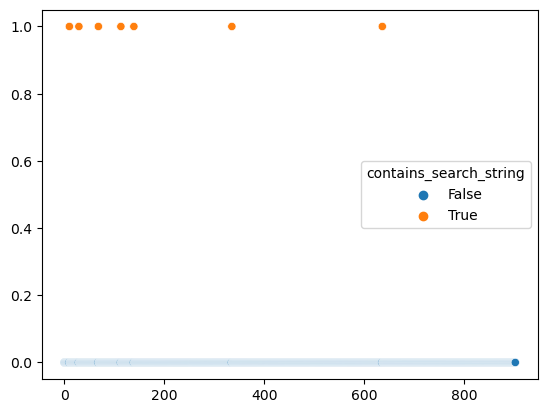

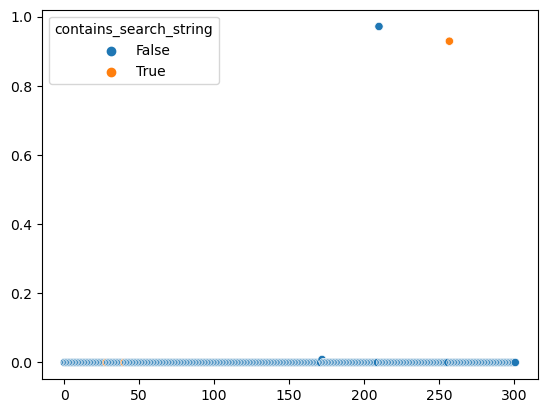

In [48]:
Y_train=model.predict(X_train)
Y_train=np.squeeze(Y_train,axis=1)
#Y_train=np.sort(Y_train)

#plt.plot(Y_train)
sns.scatterplot(x=range(903),y=Y_train,hue=y_train)
plt.figure()

Y_test=model.predict(X_test)
Y_test=np.squeeze(Y_test,axis=1)
#Y_test=np.sort(Y_test)

sns.scatterplot(x=range(302),y=Y_test,hue=y_test)

38/38 [==============================] - 0s 4ms/step
0.4


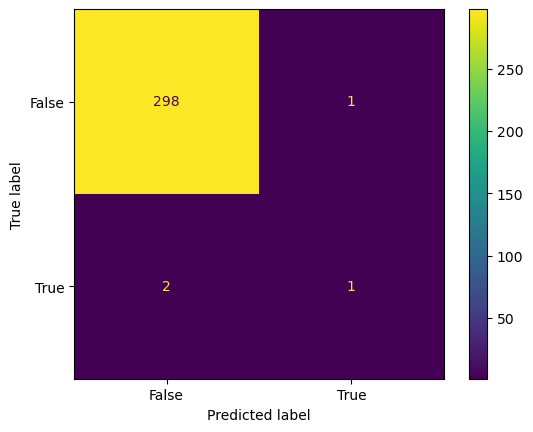

1.0


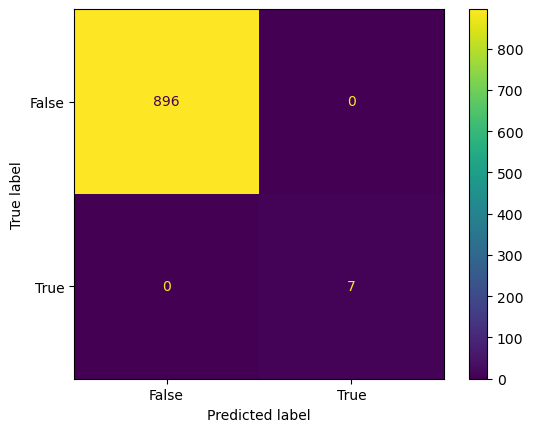

In [49]:
decision_boundary=0.5

y_train_pred=(model.predict(X_train)>decision_boundary).astype(int)
y_test_pred=(model.predict(X_test)> decision_boundary).astype(int)
y_pred=(model.predict(X)> decision_boundary).astype(int)

#-------------------------------------------------------------------------------------------

cf=confusion_matrix(y_test,y_test_pred)

TN=cf[0][0]
TP=cf[1][1]
FP=cf[0][1]
FN=cf[1][0]

Recall=devide(TP,(TP+FN))
Precision=devide(TP,(TP+FP))
if ((Recall == 0) & (Precision == 0)):
    F1=0
else: 
    F1=2*devide((Recall*Precision),(Precision+Recall))
        
print(F1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

#--------------------------------------------------------------------------------------------------------

cf=confusion_matrix(y_train,y_train_pred)

TN=cf[0][0]
TP=cf[1][1]
FP=cf[0][1]
FN=cf[1][0]

Recall=devide(TP,(TP+FN))
Precision=devide(TP,(TP+FP))
if ((Recall == 0) & (Precision == 0)):
    F1=0
else: 
    F1=2*devide((Recall*Precision),(Precision+Recall))
        
print(F1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

In [50]:
# train_arr=[]
# test_arr=[]

# train_arr=[]
# test_arr=[]

# i_arr=[]

# hand=[0.9,0.99,0.999,0.9999]
# for i in range(1,20,1):
#     decision_boundary = 0.9 + (i*0.005)

#     y_train_pred=(model.predict(X_train)>decision_boundary).astype(int)
#     y_test_pred=(model.predict(X_test)> decision_boundary).astype(int)
#     y_val_pred=(model.predict(X_val)> decision_boundary).astype(int)
#     y_pred=(model.predict(X)> decision_boundary).astype(int)

#     #-------------------------------------------------------------------------------------------

#     cf=confusion_matrix(y_test,y_test_pred)

#     TN=cf[0][0]
#     TP=cf[1][1]
#     FP=cf[0][1]
#     FN=cf[1][0]

#     Recall=devide(TP,(TP+FN))
#     Precision=devide(TP,(TP+FP))
#     if ((Recall == 0) & (Precision == 0)):
#         F1=0
#     else: 
#         F1=2*devide((Recall*Precision),(Precision+Recall))
    
#     train_arr.append(F1)
#     #--------------------------------------------------------------------------------------------------------

#     cf=confusion_matrix(y_train,y_train_pred)

#     TN=cf[0][0]
#     TP=cf[1][1]
#     FP=cf[0][1]
#     FN=cf[1][0]

#     Recall=devide(TP,(TP+FN))
#     Precision=devide(TP,(TP+FP))
#     if ((Recall == 0) & (Precision == 0)):
#         F1=0
#     else: 
#         F1=2*devide((Recall*Precision),(Precision+Recall))
        
#     test_arr.append(F1)
#     i_arr.append(decision_boundary)

        

# plt.plot(i_arr,train_arr,i_arr,test_arr)

In [51]:
print(y_pred.shape)
y_pred=np.squeeze(y_pred,axis=1)
print(y_pred.shape)

(1205, 1)
(1205,)


<AxesSubplot:xlabel='PC159', ylabel='PC124'>

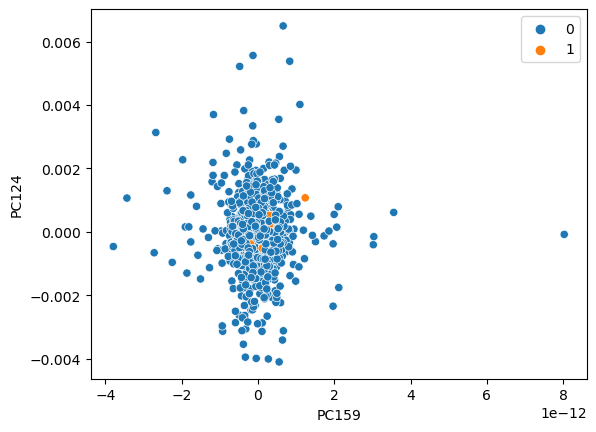

In [52]:
sns.scatterplot(x=X['PC159'] ,y=X['PC124'], hue=y_pred)

In [53]:
# empty_arr=[]
# depth_arr=[]

# for depth in range(5,100,5):
#     F1_arr=[]
#     model = Sequential(
#     [
#         layers.Input(shape=(X_train.shape[1])),
        
#         layers.Dense(200, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#         bias_regularizer=regularizers.L2(1e-4),
#         activity_regularizer=regularizers.L2(1e-5)),
        
#         layers.Dropout(rate=depth/100),
        
#         layers.Dense(200, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#         bias_regularizer=regularizers.L2(1e-4),
#         activity_regularizer=regularizers.L2(1e-5)),
        
#         layers.Dropout(rate=depth/100),
        
#         layers.Dense(200, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#         bias_regularizer=regularizers.L2(1e-4),
#         activity_regularizer=regularizers.L2(1e-5)),
        
#         layers.Dropout(rate=depth/100),
        
#         layers.Dense(200, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#         bias_regularizer=regularizers.L2(1e-4),
#         activity_regularizer=regularizers.L2(1e-5)),
        
#         layers.Dropout(rate=depth/100),
        
#         layers.Dense(200, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#         bias_regularizer=regularizers.L2(1e-4),
#         activity_regularizer=regularizers.L2(1e-5)),
        
#         layers.Dropout(rate=depth/100),
        
#         layers.Dense(1, activation='sigmoid')
#     ])

#     model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
#     for i in range(5):
#         history=model.fit(
#             X_train_o,
#             y_train_o,
#             epochs=50,
#             validation_split=0.2,
#             callbacks=[
#                 keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto")
#             ],
#         )

#         y_pred=(model.predict(X_test)> 0.5).astype(int)
        
#         cf=confusion_matrix(y_test,y_pred)
#         TN=cf[0][0]
#         TP=cf[1][1]
#         FP=cf[0][1]
#         FN=cf[1][0]

#         Recall=devide(TP,(TP+FN))
#         Precision=devide(TP,(TP+FP))
#         F1=2*devide((Recall*Precision),(Precision+Recall))
        
#         F1_arr.append(F1)
        
        
#     empty_arr.append(np.mean(F1_arr))
#     depth_arr.append(depth)
    
# plt.plot(depth_arr,empty_arr)